### **Kelompok 3**

- Dwi wahyu Maulana



### **Stock Market Analysis and Prediction using LSTM**

LSTM atau Long Short-Term Memory banyak digunakan untuk memprediksi apa yang mungkin terjadi selanjutnya, seperti harga saham di masa depan. Ini membantu kita untuk membuat keputusan yang lebih baik berdasarkan pola dan tren yang ditemukan dalam data historis. Jadi, bisa dikatakan bahwa LSTM adalah alat yang membantu komputer "belajar" dari pengalaman masa lalu untuk membuat prediksi yang lebih baik di masa depan.

**Berikut dibawah ini proses Stock Market Analysis and Prediction menggunakan LSTM :**

#### **EKSPLORASI DATA**

 **MENGKOTORKAN DATA**

Proses utama terjadi dalam loop, di mana nilai desimal dalam kolom 'Adj Close' diubah menjadi bilangan bulat hanya pada baris yang mengandung nilai desimal. Proses ini bertujuan untuk menghilangkan presisi desimal dari data tersebut. Hasil akhirnya disimpan dalam file CSV baru dengan nama 'data_kotor.csv'

In [ ]:
# Mengkotorkan data terlebih dahulu
import pandas as pd
import random

# Membaca data dari file CSV
data = pd.read_csv('BBCA.JK (1).csv')

# Menghasilkan secara acak sejumlah indeks baris yang ingin diubah
jumlah_indeks_yang_akan_diubah = 500  # Gantilah sesuai kebutuhan
baris_yang_akan_diubah = random.sample(range(len(data)), jumlah_indeks_yang_akan_diubah)

# Melakukan perubahan hanya pada baris yang mengandung nilai desimal
for indeks_baris in baris_yang_akan_diubah:
    nilai_sebelum = data.at[indeks_baris, 'Adj Close']

    # Memeriksa apakah nilai desimal sebelum mengubahnya
    if not nilai_sebelum.is_integer():
        nilai_tanpa_decimal = int(nilai_sebelum * 10000)  # Mengubah nilai desimal menjadi bilangan bulat
        data.at[indeks_baris, 'Adj Close'] = nilai_tanpa_decimal

# Menyimpan DataFrame yang telah diubah ke file CSV baru (gantilah 'nama_file_hasil.csv' dengan nama yang sesuai)
data.to_csv('data_kotor.csv', index=False)

**MEMBERSIHKAN DATA**

membersihkan nilai non-desimal pada kolom 'Adj Close', dan mengubahnya menjadi nilai desimal. Proses pembersihan melibatkan fungsi clean_adj_close, yang mengonversi nilai dengan delapan digit tanpa desimal menjadi nilai desimal dengan membaginya oleh 10000.0. DataFrame yang telah dimodifikasi kemudian disimpan dalam file CSV baru ('data_bersih.csv')

In [ ]:
# Membaca data dari file CSV (gantilah 'nama_file.csv' dengan nama file sebenarnya)
file_path = ('data_kotor.csv')
df = pd.read_csv(file_path)

# Membersihkan data dan mengubah nilai non-desimal menjadi desimal
def clean_adj_close(value):
    try:
        # Coba mengonversi nilai menjadi float
        float_value = float(value)
        # Jika nilai memiliki 8 digit dan tidak memiliki desimal, ubah menjadi desimal
        if len(str(int(float_value))) == 8 and float_value.is_integer():
            return float_value / 10000.0
    except ValueError:
        pass
    # Kembalikan nilai asli jika tidak memenuhi kondisi di atas
    return value

# Terapkan fungsi clean_adj_close pada kolom Adj Close
df['Adj Close'] = df['Adj Close'].apply(clean_adj_close)

# Menyimpan DataFrame yang telah diubah ke file CSV baru (gantilah 'nama_file_hasil.csv' dengan nama yang sesuai)
df.to_csv('data_bersih.csv', index=False)

**.tail(10)** adalah metode yang digunakan untuk menampilkan 10 baris terakhir dari suatu DataFrame atau Series. Metode ini umumnya digunakan pada objek pandas untuk melihat sebagian kecil data dari akhirnya.

In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1225,2023-11-06,8975.0,9050.0,8950.0,9050.0,9050.0,84994200
1226,2023-11-07,9000.0,9025.0,8900.0,8975.0,8975.0,60648200
1227,2023-11-08,8950.0,9000.0,8900.0,9000.0,9000.0,31829300
1228,2023-11-09,8900.0,9050.0,8900.0,9000.0,9000.0,46076800
1229,2023-11-10,8950.0,9000.0,8825.0,8825.0,8825.0,50754600
1230,2023-11-13,8875.0,8925.0,8850.0,8875.0,8875.0,20827700
1231,2023-11-14,8900.0,8950.0,8875.0,8925.0,8925.0,37195700
1232,2023-11-15,8975.0,9050.0,8950.0,9050.0,9050.0,84977900
1233,2023-11-16,9050.0,9075.0,8950.0,9075.0,9075.0,48714300
1234,2023-11-17,9025.0,9075.0,8975.0,9075.0,9075.0,57050500


.describe() menghasilkan statistik deskriptif. Statistik deskriptif mencakup ringkasan tendensi sentral, dispersi, dan bentuk distribusi kumpulan data, tanpa memasukkan nilai NaN.

Menganalisis baik seri numerik maupun objek, serta set kolom DataFrame dengan tipe data campuran. Output akan bervariasi tergantung pada apa yang disediakan

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,6996.327935,7058.587045,6931.765182,6995.016194,6704.015908,8.364642e+07
std,1256.849426,1261.087668,1257.415525,1259.689206,1385.300066,5.426646e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,4104.434570,0.000000e+00
25%,6010.000000,6055.000000,5980.000000,6007.500000,5567.419629,5.371495e+07
50%,6680.000000,6730.000000,6610.000000,6680.000000,6290.996000,7.258950e+07
75%,8050.000000,8150.000000,7950.000000,8050.000000,7812.726074,9.881005e+07
max,9425.000000,9450.000000,9375.000000,9400.000000,9400.000000,7.228279e+08


.info() menyediakan ringkasan yang melibatkan jumlah baris, jumlah kolom dan tipe data. Informasi ini sangat berguna untuk memahami data, menentukan apakah ada nilai yang hilang (null), serta memahami tipe data untuk setiap kolom.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


<Figure size 1500x1000 with 0 Axes>

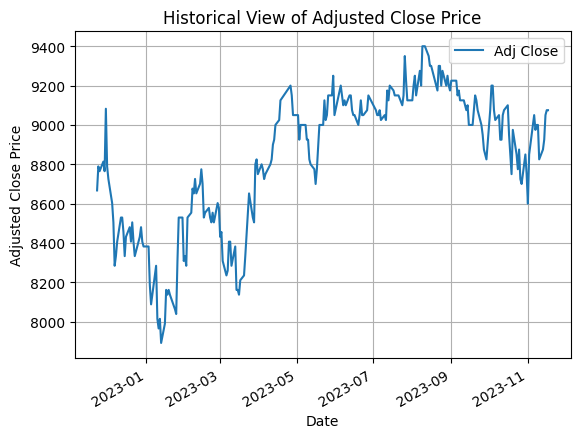

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

# Mendapatkan tanggal start dan end
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

company_list = []

# Membaca data dari file CSV
file_path = 'data_bersih.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

# Memfilter data sesuai tanggal start dan end
filtered_data = data[(data['Date'] >= start) & (data['Date'] <= end)]
company_list.append(filtered_data)

# Membuat chart historical view
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)
filtered_data.plot(x='Date', y='Adj Close')
plt.title('Historical View of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1500x1000 with 0 Axes>

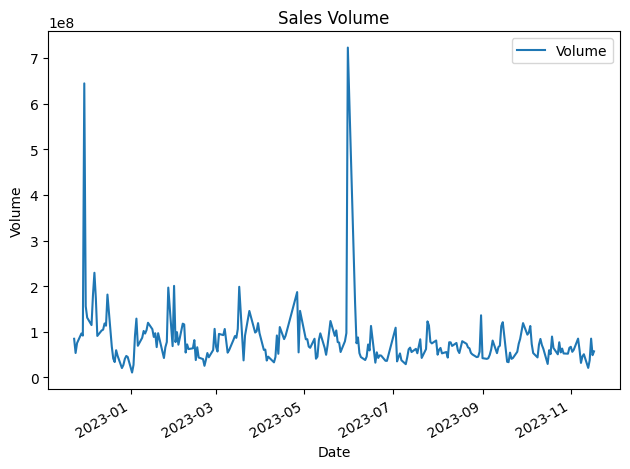

In [ ]:
# Membuat chart volume dengan data
plt.figure(figsize=(15, 10))
filtered_data.plot(x='Date', y='Volume')
plt.title('Sales Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()

plt.show()

**membuat Grafik historis tentang harga penutup yang disesuaikan bersamaan dengan Moving Averages untuk periode 10, 20, dan 50 hari**

<ipython-input-65-1df2591c1eb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MA10'] = filtered_data['Adj Close'].rolling(window=10).mean()
<ipython-input-65-1df2591c1eb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['MA20'] = filtered_data['Adj Close'].rolling(window=20).mean()
<ipython-input-65-1df2591c1eb8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

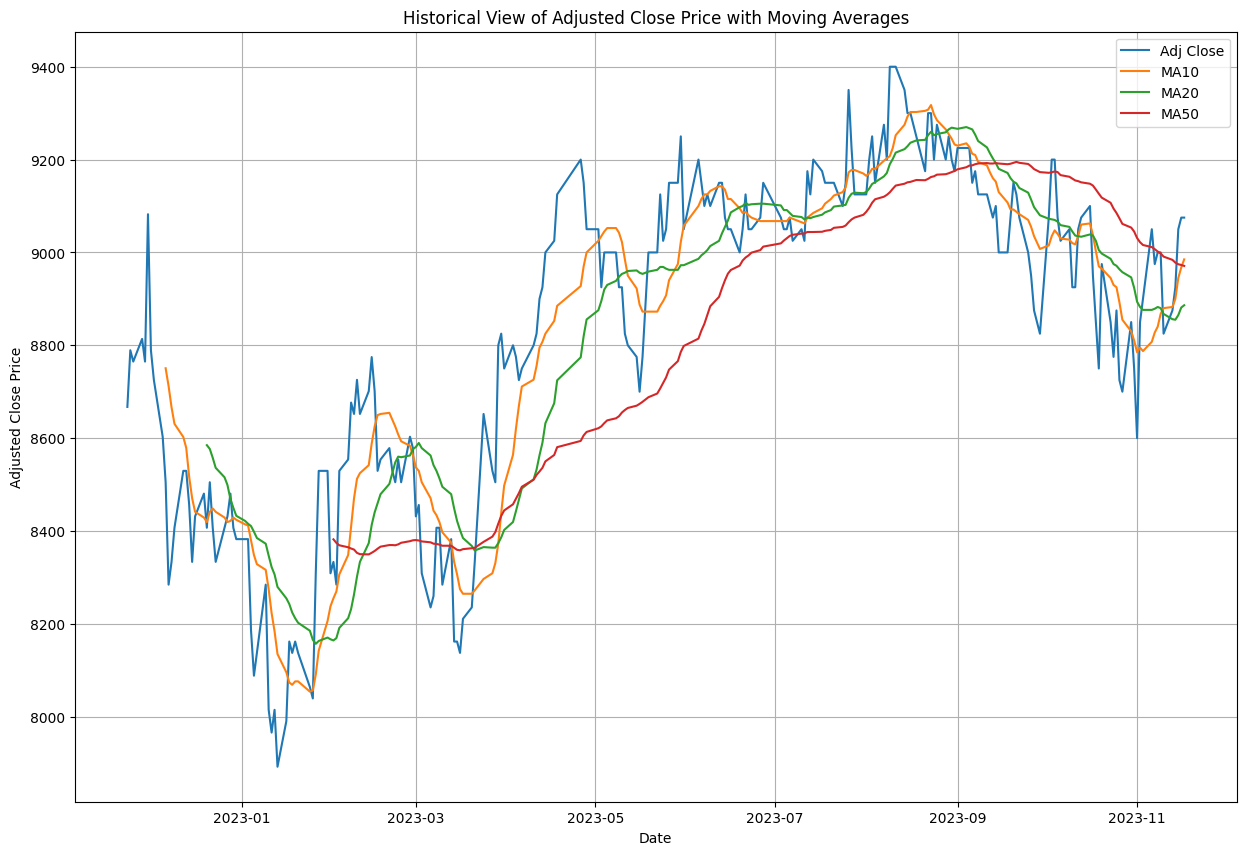

In [ ]:
# Menambahkan kolom Moving Averages (MA) dengan periode 10, 20, dan 50
filtered_data['MA10'] = filtered_data['Adj Close'].rolling(window=10).mean()
filtered_data['MA20'] = filtered_data['Adj Close'].rolling(window=20).mean()
filtered_data['MA50'] = filtered_data['Adj Close'].rolling(window=50).mean()

# Membuat chart historical view dengan Moving Averages
plt.figure(figsize=(15, 10))
plt.plot(filtered_data['Date'], filtered_data['Adj Close'], label='Adj Close')
plt.plot(filtered_data['Date'], filtered_data['MA10'], label='MA10')
plt.plot(filtered_data['Date'], filtered_data['MA20'], label='MA20')
plt.plot(filtered_data['Date'], filtered_data['MA50'], label='MA50')

plt.title('Historical View of Adjusted Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

### **Daily Percent Change**

**membuat Grafik untuk memvisualisasikan perubahan harian dalam persentase harga saham**

<ipython-input-66-b870537bdbf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Percent Change'] = filtered_data['Adj Close'].pct_change()


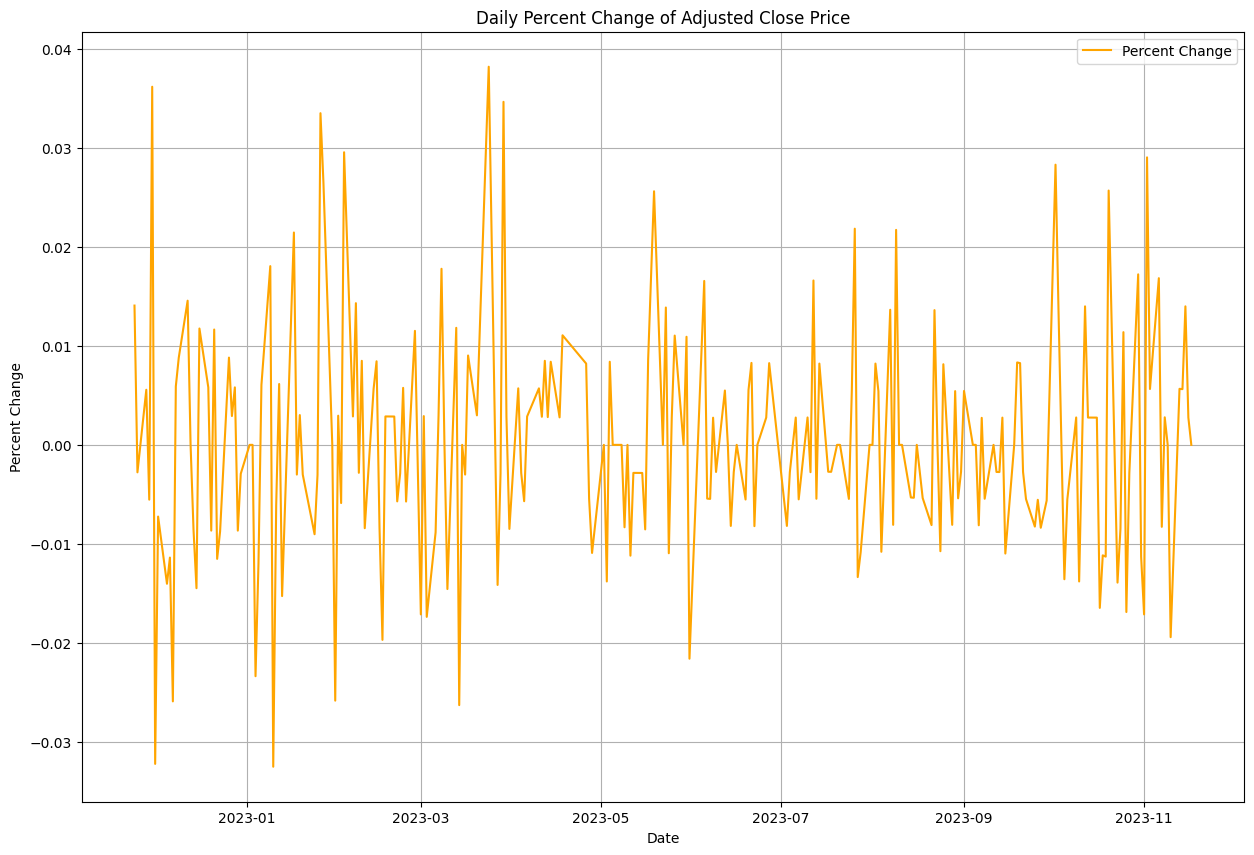

In [ ]:
filtered_data['Percent Change'] = filtered_data['Adj Close'].pct_change()

# Membuat chart percent change
plt.figure(figsize=(15, 10))
plt.plot(filtered_data['Date'], filtered_data['Percent Change'], label='Percent Change', color='orange')
plt.title('Daily Percent Change of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

# Siapkan Yahoo Finance API
yf.pdr_override()

# Get the stock quote
df = pdr.get_data_yahoo('BBCA.JK', start='2012-01-01', end=datetime.now())

# Tampilkan 10 baris pertama
print("Head of the DataFrame:")
print(df.head(10))

# Tampilkan 10 baris terakhir
print("\nTail of the DataFrame:")
print(df.tail(10))


[*********************100%%**********************]  1 of 1 completed
Head of the DataFrame:
              Open    High     Low   Close    Adj Close    Volume
Date                                                             
2012-01-02  1600.0  1600.0  1590.0  1600.0  1342.224609   7870000
2012-01-03  1620.0  1620.0  1590.0  1620.0  1359.002563  27775000
2012-01-04  1620.0  1630.0  1600.0  1620.0  1359.002563  87245000
2012-01-05  1610.0  1630.0  1610.0  1610.0  1350.613525  57197500
2012-01-06  1600.0  1610.0  1590.0  1600.0  1342.224609  27190000
2012-01-09  1630.0  1630.0  1580.0  1630.0  1367.391357  46510000
2012-01-10  1630.0  1640.0  1620.0  1630.0  1367.391357  49875000
2012-01-11  1620.0  1650.0  1610.0  1620.0  1359.002563  73070000
2012-01-12  1630.0  1640.0  1610.0  1630.0  1367.391357  63142500
2012-01-13  1600.0  1630.0  1600.0  1600.0  1342.224609        15

Tail of the DataFrame:
              Open    High     Low   Close    Adj Close     Volume
Date                     

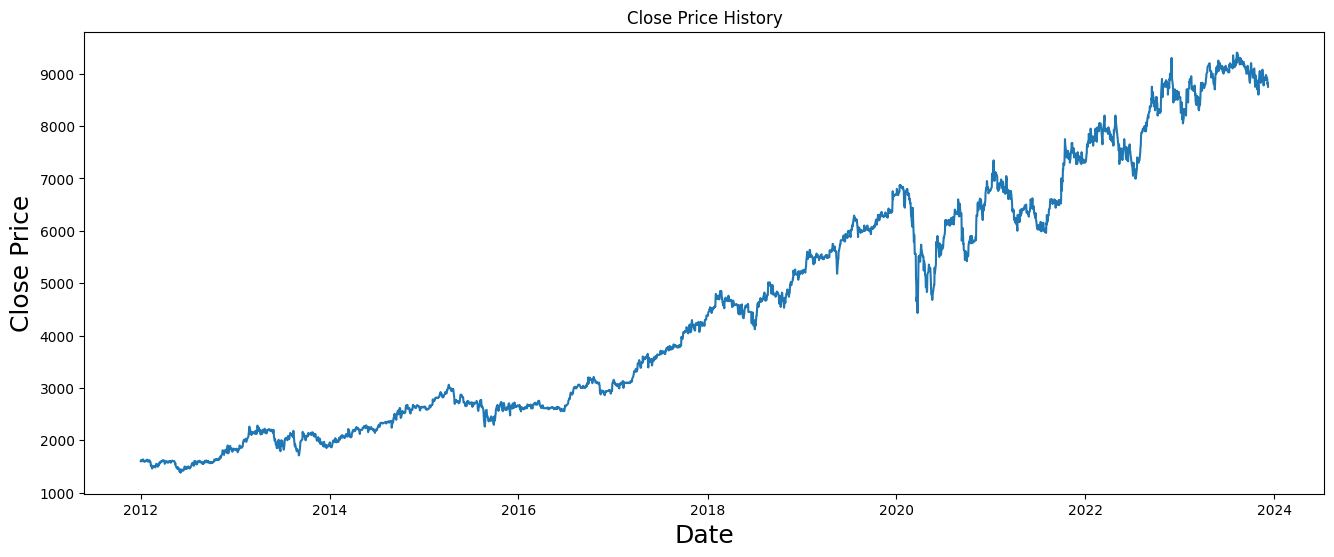

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
import numpy as np
# Buat dataframe baru hanya dengan 'Close column'
data = df.filter(['Close'])
# Ubah dataframe menjadi numpy array
dataset = data.values
# Dapatkan jumlah baris untuk melatih model
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2812

In [ ]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02743142],
       [0.02992519],
       [0.02992519],
       ...,
       [0.92518703],
       [0.92830424],
       [0.91895262]])

In [ ]:
# Buat training data set
# Buat scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Ubah x_train dan y_train menjadi numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02743142, 0.02992519, 0.02992519, 0.0286783 , 0.02743142,
       0.03117207, 0.03117207, 0.02992519, 0.03117207, 0.02743142,
       0.02618454, 0.02618454, 0.02618454, 0.02743142, 0.02743142,
       0.02992519, 0.0286783 , 0.03117207, 0.02992519, 0.02618454,
       0.02743142, 0.02743142, 0.02992519, 0.0286783 , 0.0286783 ,
       0.02493766, 0.02493766, 0.02493766, 0.01620948, 0.01745636,
       0.01246883, 0.00997506, 0.01122195, 0.01371571, 0.01371571,
       0.01620948, 0.01620948, 0.01496259, 0.01371571, 0.01246883,
       0.01371571, 0.01745636, 0.01870324, 0.02119701, 0.01995012,
       0.01995012, 0.01496259, 0.01620948, 0.01496259, 0.01995012,
       0.01870324, 0.02369077, 0.02244389, 0.02493766, 0.02618454,
       0.02743142, 0.02493766, 0.02618454, 0.02743142, 0.02992519])]
[0.02992518703241895]

[array([0.02743142, 0.02992519, 0.02992519, 0.0286783 , 0.02743142,
       0.03117207, 0.03117207, 0.02992519, 0.03117207, 0.02743142,
       0.02618454, 0.02618454, 0.02

**Decision Tree Model**

Root Mean Squared Error: 210.2092414002487


<ipython-input-20-1949e9b0dc41>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


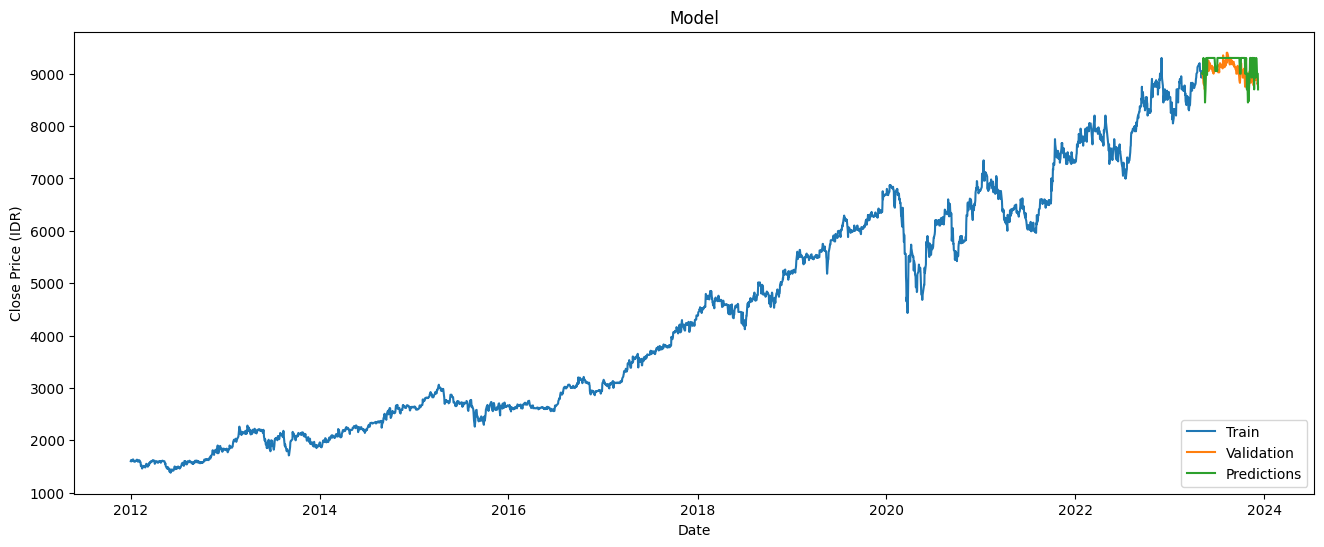

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Buat training data set
# Buat scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Ubah x_train dan y_train menjadi numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Buat model Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Buat testing data set
test_data = scaled_data[training_data_len - 60:, :]

# Buat x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Ubah x_test menjadi numpy array
x_test = np.array(x_test)

# Lakukan prediksi
predictions = model.predict(x_test)
predictions = predictions.reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# Hitung RMSE (Root Mean Squared Error)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Root Mean Squared Error:", rmse)

# Plot hasil prediksi
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price (IDR)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

Prediksi harga saham untuk kedepannya

In [ ]:
# Prepare training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Create Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Prepare data for prediction (use the last 60 days' data)
input_data = scaled_data[len(scaled_data) - 60:, 0].reshape(1, -1)

# Make a prediction for the specific date
predicted_scaled_price = model.predict(input_data)

# Inverse transform the predicted price to get the original scale
predicted_price = scaler.inverse_transform(predicted_scaled_price.reshape(-1, 1))

print("Predicted Price for 2023-11-24:", predicted_price[0, 0])

Predicted Price for 2023-11-24: 8800.0


In [ ]:
# Prepare training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Create Decision Tree Regressor model
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Prepare data for prediction (use the last 60 days' data)
input_data = scaled_data[len(scaled_data) - 60:, 0].reshape(1, -1)

# Make a prediction for the specific date (2023-11-25)
predicted_scaled_price = model.predict(input_data)

# Inverse transform the predicted price to get the original scale
predicted_price = scaler.inverse_transform(predicted_scaled_price.reshape(-1, 1))

print("Predicted Price for 2023-11-25:", predicted_price[0, 0])

Predicted Price for 2023-11-25: 8700.0


### **BUILD LSTM MODEL**

membentuk model LSTM yang dapat memproses sekuens waktu untuk memprediksi harga penutup saham

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Buat LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile modelnya
model.compile(optimizer='adam', loss='mean_squared_error')

# Train modelnya
model.fit(x_train, y_train, batch_size=1, epochs=1)

2740/2740 [==============================] - 142s 50ms/step - loss: 9.3303e-04


**Evaluasi model dan prediksi**

Melakukan evaluasi model LSTM untuk prediksi harga penutup saham. Set pengujian disiapkan dengan 60 hari harga penutup, dan model digunakan untuk memprediksi harga penutup pada set tersebut. Hasil prediksi dibandingkan dengan harga penutup sebenarnya.

In [ ]:
# Buat testing data set
# Buat array baru yang berisi nilai berskala dari indeks 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Buat data sets x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# ubah data menjadi numpy array
x_test = np.array(x_test)

# Bentuk ulang data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Dapatkan model nilai harga yang diprediksi
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# dapatkan root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 56ms/step


126.3175659895689

**Membuat visualisasi performa model LSTM dalam memprediksi harga penutup saham**

<ipython-input-173-d136017f9de9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


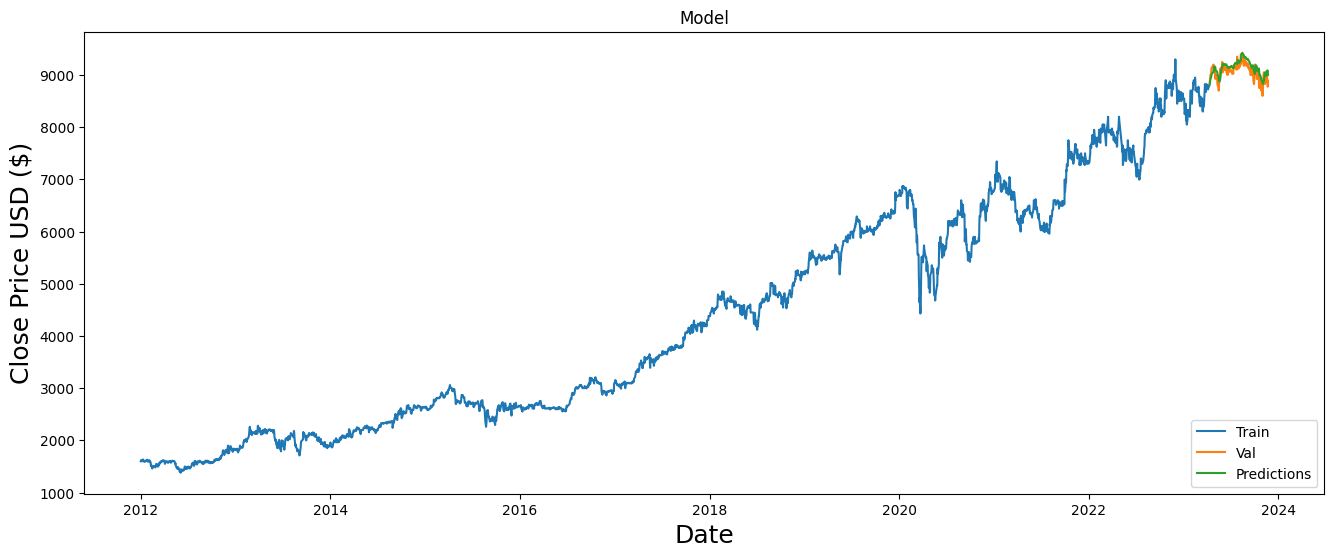

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### **PREDIKSI HARGA SAHAM DI MASA DEPAN**

Menggunakan model LSTM yang telah dilatih untuk memprediksi harga saham pada tanggal tertentu di masa depan.

In [ ]:
# Ambil data terkini
new_data = data['Close'].values[-60:]  # Mengambil 60 data terakhir, sesuaikan dengan panjang sekuens pada model Anda

# Normalisasikan data
new_data_scaled = scaler.transform(new_data.reshape(-1, 1))

# Buat sekuens data
x_new = []
x_new.append(new_data_scaled[-60:])
x_new = np.array(x_new)

# Reshape data
x_new = np.reshape(x_new, (x_new.shape[0], x_new.shape[1], 1))

# Prediksi harga saham
predicted_price = model.predict(x_new)

# Invers transform hasil prediksi
predicted_price = scaler.inverse_transform(predicted_price)

print(f'Predicted Price for 2023-11-23: {predicted_price[0][0]}')


1/1 [==============================] - 0s 34ms/step
Predicted Price for 2023-11-23: 8974.5849609375


### **PREDIKSI HARGA SAHAM UNTUK 1 HARI KEDEPANNYA**

Menggunakan data prediksi terakhir untuk memprediksi harga saham keesokan harinya.

In [ ]:
# Ambil data prediksi terakhir (menggunakan hasil prediksi sebelumnya)
last_predictions = predictions[-60:]

# Normalisasikan data
new_data_scaled = scaler.transform(last_predictions.reshape(-1, 1))

# Buat sekuens data
x_new = []
x_new.append(new_data_scaled[-60:])
x_new = np.array(x_new)

# Reshape data
x_new = np.reshape(x_new, (x_new.shape[0], x_new.shape[1], 1))

# Prediksi harga saham
predicted_price = model.predict(x_new)

# Invers transform hasil prediksi
predicted_price = scaler.inverse_transform(predicted_price)

print(f'Predicted Price for 2023-11-24: {predicted_price[0][0]}')

1/1 [==============================] - 0s 32ms/step
Predicted Price for 2023-11-24: 9115.1064453125



Evaluasi

Dalam konteks prediksi harga saham, di mana seringkali terdapat hubungan temporal yang penting, LSTM cenderung lebih unggul. LSTM mampu menangkap pola jangka panjang dan ketergantungan temporal, yang merupakan karakteristik penting dalam data deret waktu seperti harga saham. Namun, perlu diingat bahwa performa model juga dapat dipengaruhi oleh sejumlah faktor, termasuk jumlah data yang tersedia, kualitas fitur, dan penyesuaian parameter model.

Pola Jangka Panjang:

1. Dalam konteks prediksi harga saham, seringkali terdapat pola atau tren jangka panjang yang tidak dapat dengan mudah diidentifikasi oleh model sederhana seperti Decision Tree. Contohnya, tren harga saham yang terus naik atau turun selama beberapa periode.

2. LSTM, dengan unit memori jangka panjangnya, dirancang untuk secara efektif menyimpan informasi dari periode-periode sebelumnya. Hal ini memungkinkan LSTM untuk menangkap dan memodelkan pola jangka panjang yang mungkin terdapat dalam data harga saham.

Ketergantungan Temporal:

1. Harga saham pada suatu waktu seringkali tergantung pada harga pada waktu sebelumnya. Misalnya, harga saham pada hari ini mungkin dipengaruhi oleh peristiwa atau kondisi pasar yang terjadi beberapa hari sebelumnya.

2. LSTM memiliki kemampuan untuk menangkap ketergantungan temporal dengan memproses dan menyimpan informasi dari berbagai periode waktu sebelumnya. Dengan adanya sel-sel memori dan mekanisme gerbang (gate mechanism) yang memungkinkan kontrol atas aliran informasi dalam dan keluar dari memori, LSTM dapat menjaga ketergantungan temporal yang penting dalam data deret waktu.